In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
np.set_printoptions(precision=3, suppress=False)

print(pd.__version__)

1.3.4


# 2. Biểu đồ bubble

In [2]:
# Giả sử ta có dữ liệu về tình hình hoạt động của các chi nhánh như sau:
text = """Chi nhánh, Nhân lực, Hiệu suất, Doanh thu
Chi Nhánh 1,127,78.2,2569804
Chi Nhánh 2,105,82,575747
Chi Nhánh 3,104,80.8,612167
Chi Nhánh 4,87,83.1,5622455
Chi Nhánh 5,77,77.7,423196
Chi Nhánh 6,72,77.1,9269612
Chi Nhánh 7,62,83.4,8401739
Chi Nhánh 8,59,81.8,5254694
Chi Nhánh 9,58,84.3,7302843"""
text

'Chi nhánh, Nhân lực, Hiệu suất, Doanh thu\nChi Nhánh 1,127,78.2,2569804\nChi Nhánh 2,105,82,575747\nChi Nhánh 3,104,80.8,612167\nChi Nhánh 4,87,83.1,5622455\nChi Nhánh 5,77,77.7,423196\nChi Nhánh 6,72,77.1,9269612\nChi Nhánh 7,62,83.4,8401739\nChi Nhánh 8,59,81.8,5254694\nChi Nhánh 9,58,84.3,7302843'

In [3]:
# Thay vì đọc vào DataFrame từ file, có thể đọc từ io stream
import io
pd.read_csv(io.StringIO(text), sep=',')

,Chi nhánh,Nhân lực,Hiệu suất,Doanh thu
0,Chi Nhánh 1,127,78.2,2569804
1,Chi Nhánh 2,105,82.0,575747
2,Chi Nhánh 3,104,80.8,612167
3,Chi Nhánh 4,87,83.1,5622455
4,Chi Nhánh 5,77,77.7,423196
5,Chi Nhánh 6,72,77.1,9269612
6,Chi Nhánh 7,62,83.4,8401739
7,Chi Nhánh 8,59,81.8,5254694
8,Chi Nhánh 9,58,84.3,7302843


In [4]:
colors = ['blue', 'pink', 'red', 'cyan', 'green', 'yellow', 'gray', 'purple', 'orange']

In [5]:
# Lưu ý: trong dữ liệu trên phần header có khoảng trắng sau dấu phẩy,
#        cần phải thực hiện strip cho các items của columns
test_data = pd.read_csv(io.StringIO(text), sep=',')
test_data.columns = test_data.columns.str.strip()
test_data['Doanh thu']

0    2569804
1     575747
2     612167
3    5622455
4     423196
5    9269612
6    8401739
7    5254694
8    7302843
Name: Doanh thu, dtype: int64

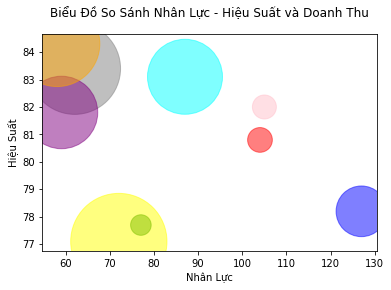

In [6]:
# Thử vẽ biểu đồ scatter với size là Doanh thu
# Lưu ý: phải thiết lập scale của kích thước hợp lý
plt.scatter(x=test_data['Nhân lực'],
            y=test_data['Hiệu suất'],
            s=test_data['Doanh thu']/1000, 
            alpha=0.5,
            c=colors)
plt.xlabel('Nhân Lực')
plt.ylabel('Hiệu Suất')
plt.title('Biểu Đồ So Sánh Nhân Lực - Hiệu Suất và Doanh Thu', y=1.05)
plt.show()
plt.close('all')

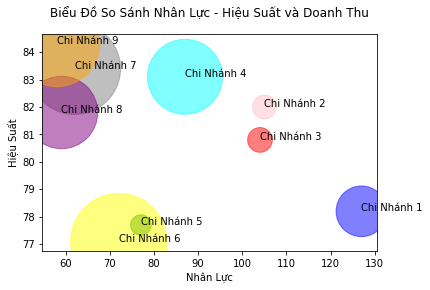

In [11]:
# Thực hiện in thêm tên của các chi nhánh vào các Bubble
# Dùng hàm plt.annotate hoặc plt.text
plt.scatter(x=test_data['Nhân lực'],
            y=test_data['Hiệu suất'],
            s=test_data['Doanh thu']/1000, 
            alpha=0.5,
            c=colors)
plt.xlabel('Nhân Lực')
plt.ylabel('Hiệu Suất')
plt.title('Biểu Đồ So Sánh Nhân Lực - Hiệu Suất và Doanh Thu', y=1.05)

# plt.annotate('Tên CN', (80, 79))
# plt.text(x=80, y=79, s='Tên CN')

x,y = test_data['Nhân lực'], test_data['Hiệu suất']
for i, txt in enumerate(test_data['Chi nhánh']):
    plt.annotate(txt, (x[i], y[i]))

plt.show()
plt.close('all')

# 3. Biểu đồ Box

In [2]:
np.random.seed(1)
arr = np.random.normal(10,2,(100,4))
print(arr.shape)

(100, 4)


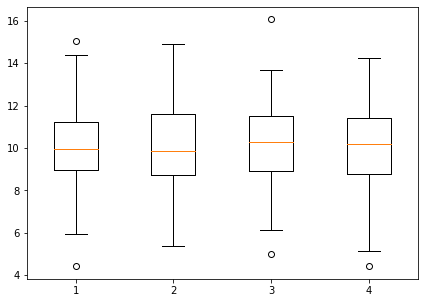

In [3]:
fig,ax = plt.subplots(figsize=(7,5), num=1)
ax.boxplot(arr)

plt.show()
plt.close('all')

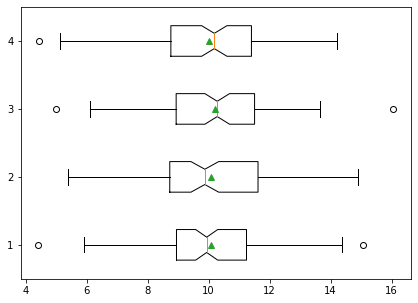

In [22]:
# Vẽ biểu đồ box dạng nằm ngang, "thắt eo" (notch=True), hiển thị Mean (showmeans=True)
fig,ax = plt.subplots(figsize=(7,5), num=1)
ax.boxplot(arr, notch ='True', vert = False, showmeans=True)

plt.show()
plt.close('all')

**Đổi dạng marker cho giá trị ngoại biên và tô màu box**

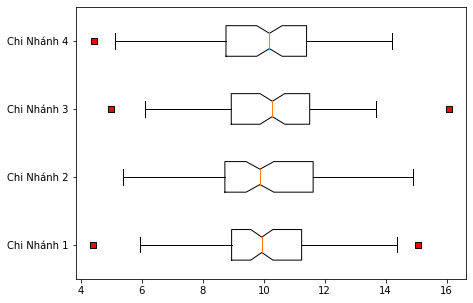

In [6]:
# Đổi dạng marker cho giá trị ngoại biên
# Định nghĩa một marker là red_square rồi gán cho tham số flierprops
red_square = dict(markerfacecolor='r', marker='s')

labels = ['Chi Nhánh 1', 'Chi Nhánh 2', 'Chi Nhánh 3', 'Chi Nhánh 4']

fig,ax = plt.subplots(figsize=(7,5), num=1)
ax.boxplot(arr, notch ='True', vert = False, flierprops=red_square, labels=labels)

plt.show()
plt.close('all')

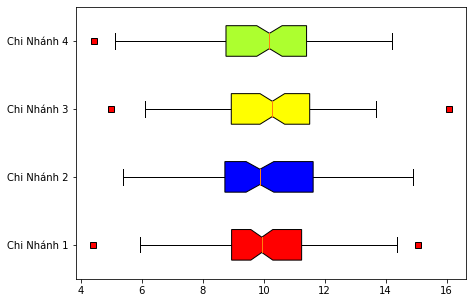

In [9]:
# Tô màu cho từng box
# Lưu ý: lúc gọi hàm vẽ boxplot phải set "patch_artist=True"
red_square = dict(markerfacecolor='r', marker='s')
labels = ['Chi Nhánh 1', 'Chi Nhánh 2', 'Chi Nhánh 3', 'Chi Nhánh 4']

fig,ax = plt.subplots(figsize=(7,5), num=1)
bp = ax.boxplot(arr, notch ='True', vert = False, labels=labels,
                flierprops=red_square, patch_artist=True)

# print(bp['boxes'][0])
# bp['boxes'][0].set(facecolor = 'b')
# bp['boxes'][1].set(facecolor = 'r')
# bp['boxes'][2].set(facecolor = 'violet')
# bp['boxes'][3].set(facecolor = 'y')

colors = ['#FF0000', '#0000FF', '#FFFF00', '#ADFF2F', '#FFA500']
for i,box in enumerate(bp['boxes']):
    box.set(facecolor = colors[i])
    
plt.show()
plt.close('all')

**So sánh với biểu đồ violin**

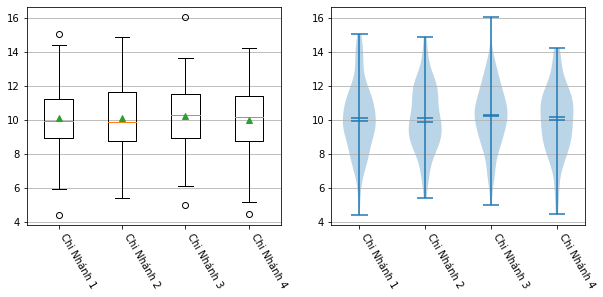

In [24]:
fig = plt.figure(figsize=(10,4))

# Biểu đồ boxplot 
ax1 = fig.add_subplot(1,2,1)
ax1.boxplot(arr, showmeans=True, labels=labels)
ax1.set_xticklabels(labels, rotation=-60, ha='left')
ax1.yaxis.grid(True)

# Biểu đồ violin
ax2 = fig.add_subplot(1,2,2)
ax2.violinplot(arr, showmeans=True, showmedians=True, 
               showextrema=True 
               # labels=labels
              )
# Lưu ý: phải set vị trí của xticks
ax2.set_xticks([1,2,3,4])
ax2.set_xticklabels(labels, rotation=-60, ha='left')
ax2.yaxis.grid(True)

plt.show()
plt.close('all')

# 5. Biểu đồ radar

**Hiểu về biểu đồ radar**

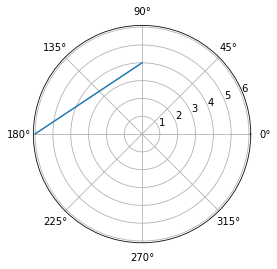

In [28]:
# Thử vẽ một biểu đồ dạng polar
# 3.14 chính là giá trị của PI, tương ứng 180 độ
fig = plt.figure(figsize=(4,4))
# ax = fig.add_subplot(polar=True)
ax = fig.add_subplot(projection='polar')

# ax.plot([np.radians(135),1], [7,4], marker='o')
ax.plot([3.14/2,3.14], [4,6])

plt.show()
plt.close('all')

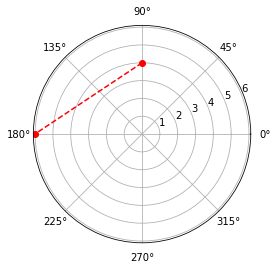

In [29]:
# Có thể thay đổi dạng đường, màu sắc giống như vẽ line thông thường
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(polar=True)
ax.plot([3.14/2,3.14], [4,6], linestyle='--', color='red', marker='o')

plt.show()
plt.close('all')

In [32]:
goc = [3.14/2,3.14, 3.14*1.75, 3.14/2]
r   = [4,6,5,4]

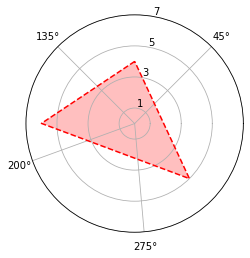

In [33]:
# Để vẽ trọn một vùng, cần nối điểm cuối với điểm đầu
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(polar=True)

ax.plot([3.14/2, 3.14, 3.14*1.75, 3.14/2], [4,6,5,4], linestyle='--', color='red')

# Tô màu vùng bên trong
ax.fill([3.14/2, 3.14, 3.14*1.75, 3.14/2], [4,6,5,4], facecolor='red', alpha=0.25)

# Thiết lập các bước của lưới
ax.set_rgrids([1, 3, 5, 7])

# Thiết lập vị trí (độ) in ra giá trị bước lưới
ax.set_rlabel_position(80)

# Thiết lập góc vẽ trục lưới (ít khi dùng)
ax.set_thetagrids([45,135,200,275])

plt.show()
plt.close('all')

**Thử với dữ liệu giống thực tế**

In [35]:
# Một cách ghép thêm phần tử đầu chuỗi vào cuối chuỗi cũ
restaurant_1 = [4, 4, 5, 4, 3]
[*restaurant_1, restaurant_1[0]]

[4, 4, 5, 4, 3, 4]

In [12]:
# Cách khác
restaurant_1 = [4, 4, 5, 4, 3]
restaurant_1 += [restaurant_1[0]]
restaurant_1

[4, 4, 5, 4, 3, 4]

In [39]:
# Giả sử có thông tin về dịch vụ của nhà hàng như sau
categories = ['Food Quality', 'Food Variety', 'Service Quality', 'Ambiance', 'Affordability']
categories = [*categories, categories[0]]

restaurant_1 = [4, 4, 5, 4, 3]
restaurant_2 = [5, 5, 4, 5, 2]
restaurant_3 = [3, 4, 5, 3, 5]
restaurant_1 = [*restaurant_1, restaurant_1[0]]
restaurant_2 = [*restaurant_2, restaurant_2[0]]
restaurant_3 = [*restaurant_3, restaurant_3[0]]

In [40]:
# np.linspace, trả về những số cách đều nhau trong khoảng cụ thể
label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(restaurant_1))
label_loc

array([0.   , 1.257, 2.513, 3.77 , 5.027, 6.283])

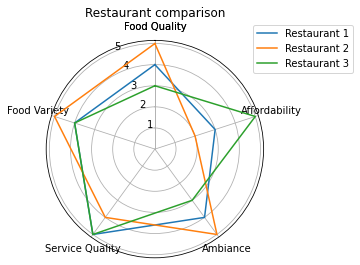

In [42]:
plt.figure(figsize=(4, 4))
ax = plt.subplot(polar=True)
#ax.set_theta_zero_location('N')
ax.set_theta_offset(np.radians(90))

ax.plot(label_loc, restaurant_1, label='Restaurant 1')
ax.plot(label_loc, restaurant_2, label='Restaurant 2')
ax.plot(label_loc, restaurant_3, label='Restaurant 3')
ax.set_title('Restaurant comparison', size=12, y=1.08)

lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)
ax.legend(loc=[0.95, 0.85])
plt.show()
plt.close('all')

# 6. Đọc và hiển thị ảnh với hàm imread() và imshow()

In [51]:
img = plt.imread('Lo-trinh-DS.png')
print(img.shape)
print(type(img))
# cao (pixel), rộng, kênh

(871, 1513, 4)
<class 'numpy.ndarray'>


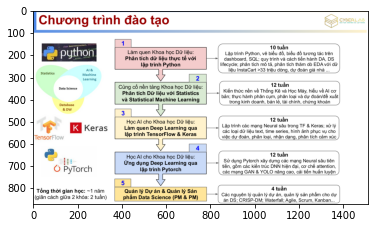

In [52]:
plt.imshow(img[:,:,:])
plt.show()
plt.close('all')